# **Messy IPYNB File**

## Importing libraries

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as cx

In [2]:
bird_health_df = pd.read_excel("data/birds.xlsx",sheet_name="Capture and Health")
bird_vhf_df = pd.read_excel('data/birds.xlsx',sheet_name="VHF Telemetry")
bird_sat_df = pd.read_excel('data/birds.xlsx',sheet_name="Satellite Telemetry")
bird_amoy_df = pd.read_excel('data/birds.xlsx',sheet_name="AMOY Survey")

In [3]:
bird_health_df.head()

,Data Publication Date,Data Publication Reference,Study Reference Number,Study Name,Capture ID,Bird Code,Common Name,Scientific Name,FWS Band,Color Band,...,Blood Feather Comments,Release Health ID,Release Breathing,Release Attitude,Release Comments,NA Health ID,NA Breathing,NA Attitude,NA Comments,Field Data Verification Status
0,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",13,AMOY-012,American Oystercatcher,Haematopus palliatus,1106-16404,CMR(C5),...,NaN,6435.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
1,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",14,AMOY-013,American Oystercatcher,Haematopus palliatus,1106-16312,MR(C0),...,NaN,6440.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
2,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",15,AMOY-014,American Oystercatcher,Haematopus palliatus,1106-16313,MR(F0),...,NaN,6445.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
3,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",16,AMOY-015,American Oystercatcher,Haematopus palliatus,1106-16311,MR (E2),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underway
4,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",17,AMOY-016,American Oystercatcher,Haematopus palliatus,1106-16314,MR(H1),...,NaN,6468.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway


Note - For bird health data, I want to try geo plotting with longitude and lattitudes with amount of oil.
could i do machine learning?? predictions?

In [210]:
#isolating a df of just lat, long, and yes to visual oiling
birdOil = bird_health_df[['Capture Latitude', 'Capture Longitude', 'Visual Oiling']]
print(birdOil.head())
birdOil['Visual Oiling'].unique()

   Capture Latitude  Capture Longitude  \
0          29.08955          -90.84030   
1          29.05656          -90.86454   
2          29.05656          -90.86454   
3          29.05656          -90.86454   
4          29.11760          -90.86320   

                                       Visual Oiling  
0  Trace amounts of oil detected on bird by visua...  
1  Trace amounts of oil detected on bird by visua...  
2  Trace amounts of oil detected on bird by visua...  
3  Trace amounts of oil detected on bird by visua...  
4  Trace amounts of oil detected on bird by visua...  


array(['Trace amounts of oil detected on bird by visual evaluation.',
       'No oil detected on bird by visual evaluation.',
       'Not assessment of oil on bird by visual evaluation.',
       'Light amounts of oil detected on bird by visual evaluation.',
       'Heavy amounts of oil  detected on bird by visual evaluation.',
       'Moderate amounts of oil detected on bird by visual evaluation.'],
      dtype=object)

In [165]:
#cleaning data to remove no assesment and turning it into better strings
birdOil = birdOil[birdOil['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
birdOil = birdOil[birdOil['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']
print(birdOil['Visual Oiling'].unique())
#making strings shorter
birdOil['Visual Oiling'] = birdOil['Visual Oiling'].apply(lambda x: x.split(' ')[0])
print(birdOil['Visual Oiling'].unique())
birdOil.rename(columns={'Visual Oiling':'oiling', 'Capture Latitude': 'latitude', 'Capture Longitude':'longitude'},inplace=True)

['Trace amounts of oil detected on bird by visual evaluation.'
 'Light amounts of oil detected on bird by visual evaluation.'
 'Heavy amounts of oil  detected on bird by visual evaluation.'
 'Moderate amounts of oil detected on bird by visual evaluation.']
['Trace' 'Light' 'Heavy' 'Moderate']


   latitude  longitude oiling
0  29.08955  -90.84030  Trace
1  29.05656  -90.86454  Trace
2  29.05656  -90.86454  Trace
3  29.05656  -90.86454  Trace
4  29.11760  -90.86320  Trace


<AxesSubplot:>

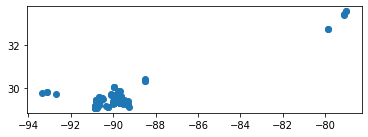

In [166]:
print(birdOil.head())
geodf = gpd.GeoDataFrame(birdOil,geometry=gpd.points_from_xy(birdOil.longitude,birdOil.latitude))
geodf.head()
geodf.plot()

   FID          Program State_Code  State_Name Flowing_St  FID_1  \
0    1  PERMIT TRACKING         AL     ALABAMA          F    919   
1    2             None         AK      ALASKA          N    920   
2    3          AZURITE         AZ     ARIZONA          F    921   
3    4              PDS         AR    ARKANSAS          F    922   
4    5             None         CA  CALIFORNIA          N    923   

                                            geometry  
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...  
1  MULTIPOLYGON (((-161.33379 58.73325, -161.3824...  
2  POLYGON ((-114.52063 33.02771, -114.55909 33.0...  
3  POLYGON ((-94.46169 34.19677, -94.45262 34.508...  
4  MULTIPOLYGON (((-121.66522 38.16929, -121.7823...  


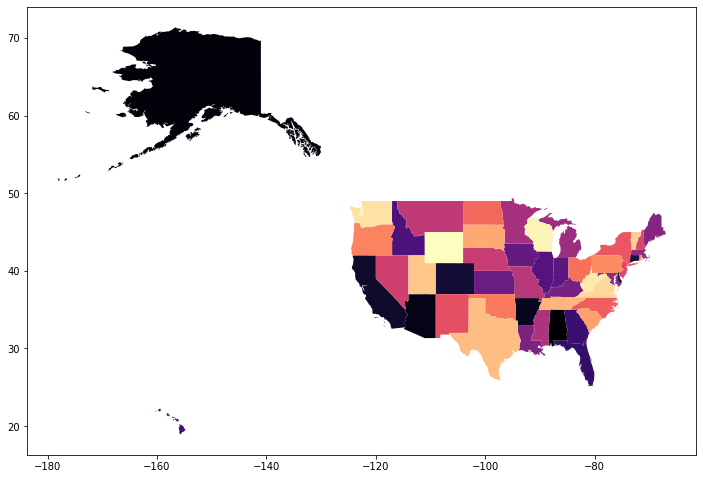

In [174]:
## Geoplotting where birds were found oiled in some capacity compared to explosion location
states = gpd.read_file('data/maps/States_shapefile.shp')
print(states.head())
states.plot(cmap='magma', figsize=(12,12))
southeast = states[states['State_Code'].isin(['FL','GA','AL','SC','NC', 'TN', 'LA', 'MS', 'VA'])]

Trace       158
Light        17
Moderate      1
Heavy         1
Name: oiling, dtype: int64


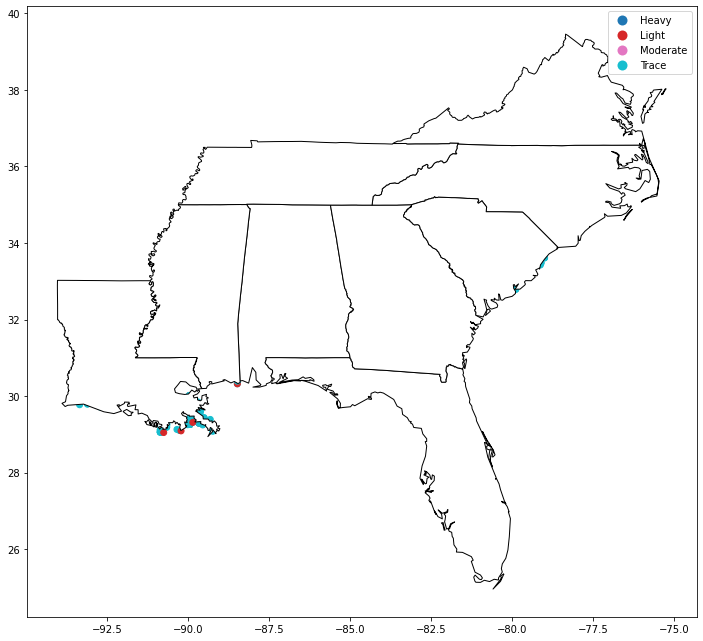

In [168]:
print(geodf['oiling'].value_counts())
ax = geodf.plot(column='oiling',legend=True,figsize=(12,12))
base = southeast.plot(ax=ax,color = 'white',edgecolor='black',figsize=(12,12),legend=True)

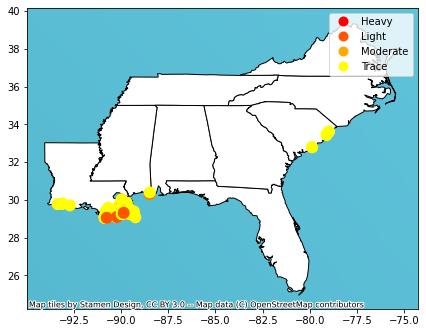

In [173]:
ax = southeast.plot(color = 'white',edgecolor='black',figsize=(7,7),legend=True)
geodf.plot(ax=ax,column='oiling',legend=True,figsize=(10,10),marker='o',linewidth=6,cmap='autumn')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)

In [342]:
#let's compare whether birds showed visible oiling if site was oiled 
#grouped bar chart - site oiled, vs not oiled; two bars in each one for # of visual, one for # fluores


siteEffects =  bird_health_df[['Site Oiling', 'Visual Oiling', 'Fluorescence Assessment']]
print(siteEffects['Visual Oiling'].unique())
#siteEffects = siteEffects[siteEffects['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
#siteEffects = siteEffects[siteEffects['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']
print(siteEffects['Visual Oiling'].unique())
#siteEffects = siteEffects[siteEffects['Fluorescence Assessment'] != 'No assessment of oil on bird by UV fluorescence evaluation.']
#siteEffects = siteEffects[siteEffects['Fluorescence Assessment'] != 'No oil detected on bird by UV fluorescence evaluation.']
print(siteEffects['Visual Oiling'].unique())
siteEffects['Visual Oiling'] = siteEffects['Visual Oiling'].apply(lambda x: x.split(' ')[0])
siteEffects['Fluorescence Assessment'] = siteEffects['Fluorescence Assessment'].apply(lambda x: x.split(' ')[0])


siteEffects.head()
siteEffects['Visual Oiling'].unique()

['Trace amounts of oil detected on bird by visual evaluation.'
 'No oil detected on bird by visual evaluation.'
 'Not assessment of oil on bird by visual evaluation.'
 'Light amounts of oil detected on bird by visual evaluation.'
 'Heavy amounts of oil  detected on bird by visual evaluation.'
 'Moderate amounts of oil detected on bird by visual evaluation.']
['Trace amounts of oil detected on bird by visual evaluation.'
 'No oil detected on bird by visual evaluation.'
 'Not assessment of oil on bird by visual evaluation.'
 'Light amounts of oil detected on bird by visual evaluation.'
 'Heavy amounts of oil  detected on bird by visual evaluation.'
 'Moderate amounts of oil detected on bird by visual evaluation.']
['Trace amounts of oil detected on bird by visual evaluation.'
 'No oil detected on bird by visual evaluation.'
 'Not assessment of oil on bird by visual evaluation.'
 'Light amounts of oil detected on bird by visual evaluation.'
 'Heavy amounts of oil  detected on bird by visu

<ipython-input-342-b799b14938e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siteEffects['Visual Oiling'] = siteEffects['Visual Oiling'].apply(lambda x: x.split(' ')[0])
<ipython-input-342-b799b14938e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  siteEffects['Fluorescence Assessment'] = siteEffects['Fluorescence Assessment'].apply(lambda x: x.split(' ')[0])


array(['Trace', 'No', 'Not', 'Light', 'Heavy', 'Moderate'], dtype=object)

In [343]:
siteEffects['Site Oiling'].unique()
siteEffects = siteEffects[siteEffects['Site Oiling'] != 'No recorded assessment of oiling at site.']
siteEffects['Site Oiling'] = siteEffects['Site Oiling'].apply(lambda x: x.split(' ')[0])
#siteEffects.loc[(siteEffects['Site Oiling'] =='Oiling')] = 'Yes'
siteEffects.head(5)
siteEffects['Visual Oiling'].unique()

array(['Trace', 'No', 'Not', 'Light', 'Heavy', 'Moderate'], dtype=object)

In [344]:
#Numbering oiling and flurescence
noAssesVis = (siteEffects['Visual Oiling'] == 'Not').sum()
noAssesFluor = (siteEffects['Fluorescence Assessment'] == 'Not').sum()

oilNums = {'No':0.0, 'Not':0.0, 'Trace':1.0, 'Light':1.0, 'Moderate':1.0,'Heavy':1.0}
siteCheck = {'Oiling':'Yes', 'No': 'No'}
siteEffects.rename(columns={'Visual Oiling':'visual', 'Fluorescence Assessment': 'fluorescence','Site Oiling':'site'},inplace=True)
print(siteEffects['visual'].unique())
siteEffects.visual = [oilNums[item] for item in siteEffects.visual]
siteEffects.fluorescence = [oilNums[item] for item in siteEffects.fluorescence]
siteEffects.site = [siteCheck[item] for item in siteEffects.site]
countVis = siteEffects['visual'].count()
countFluor =siteEffects['fluorescence'].count()
siteEffects.head()

['Trace' 'No' 'Not' 'Light' 'Heavy' 'Moderate']


,site,visual,fluorescence
0,No,1.0,0.0
1,No,1.0,0.0
2,No,1.0,0.0
4,No,1.0,0.0
5,No,1.0,0.0


In [345]:
#visualCount = siteEffects.visual.value_counts()
#sumVisual = siteEffects.visual.sum()
#fluorCount = siteEffects.fluorescence.value_counts()
#print(siteEffects.visual.unique())
#print("vis count;" + str(visualCount))
#print("sum;" + str(sumVisual))
#print("f count;" +str(fluorCount))
siteEffects = siteEffects.groupby('site').agg({'visual':'sum','fluorescence':'sum'})
print(noAssesVis)
print(countVis)
print(noAssesFluor)
print(countFluor)

siteEffects['visual'] = siteEffects['visual'].apply(lambda x: (x/(countVis - noAssesVis) * 100))
siteEffects['fluorescence']= siteEffects['fluorescence'].apply(lambda x: (x/(countFluor - noAssesFluor) * 100))
#siteEffects['visual_oil_percent'] = (siteEffects['visual'] / siteEffects['visual'].value_counts() - noAssesVis) * 100
#siteEffects['fluorescent_oil_percent'] = (siteEffects['fluorescence'] / siteEffects['fluorescence'].value_counts() - noAssesFluor) * 100

#effects= siteEffects[['visual_oil_percent','fluorescent_oil_percent']]
siteEffects.head()
#Let's create a grouped bar chart of this


#plt.title("Number of Birds Observed with Oiling under Visual and UV Observation")
#sns.catplot(data=siteEffects, kind="bar", x="Site Oiling", hue='Site Oiling')


11
843
0
843


,visual,fluorescence
site,,
No,15.504808,22.775801
Yes,5.168269,18.742586


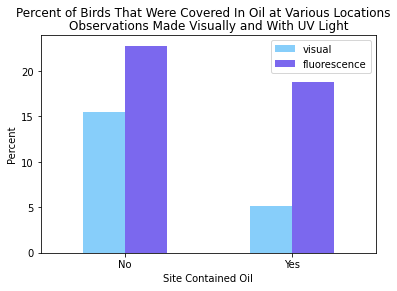

In [361]:
siteEffects.plot.bar(rot=0,color={'visual':'lightskyblue','fluorescence':'mediumslateblue'})
plt.suptitle("Percent of Birds That Were Covered In Oil at Various Locations")
plt.title("Observations Made Visually and With UV Light")
plt.xlabel("Site Contained Oil")
plt.ylabel("Percent")
plt.show()

## Oil Content of Sand Data

In [346]:
oil_sand_df = pd.read_excel('data/oil-sand.xlsx',sheet_name="data")
oil_sand_df.tail() ## need to drop last 4 rows
oil_sand_df.drop(oil_sand_df.tail(4).index,inplace = True) ## need to drop last 4 rows
oil_sand_df.tail() 

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
560,561,6/24/2014,062414-41,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1040,ND
561,562,6/24/2014,062414-42,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1959,ND
562,563,6/24/2014,062414-43,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1589,ND
563,564,6/24/2014,062414-44,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1091,ND
564,565,6/24/2014,062414-45,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1368,ND


In [5]:
oil_sand_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Number                565 non-null    object 
 1   Collection Date              565 non-null    object 
 2   Sample ID                    565 non-null    object 
 3   Sampling Location            565 non-null    object 
 4   Latitude                     565 non-null    float64
 5   Longitude                    565 non-null    float64
 6   Processing Lab               565 non-null    object 
 7   Fractional Oil Content       565 non-null    float64
 8   Fractional Moisture Content  565 non-null    object 
dtypes: float64(3), object(6)
memory usage: 44.1+ KB


In [6]:
#IDEA - map points of oil content in sand with different colors on a scale
# oil content over time on certain islands in florida
#representing more or less fractional oil conted

In [7]:
## Let's look at unique sampling locations
oil_sand_df['Sampling Location'].unique()

array(['Dauphin Island, AL', 'Perdido Key, FL', 'Gulf Shores, AL',
       'Fort Morgan, AL', 'Gulfport, MS', "Elmer's Island, LA",
       'Fort Pickens, FL', 'Horn Island, MS', 'West Ship Island, MS',
       'East Ship Island, MS', 'Gulf State Park, AL',
       'Pass Christian, MS', 'Grand Isle, LA', 'Waveland, MS',
       'Pensacola Beach, FL', 'Port Fourchon, LA'], dtype=object)

In [28]:
#change location to just state name and let's plot the oil content over time 
oil_areas_df['Sampling Location'] = oil_sand_df['Sampling Location'].apply(lambda x: x.split(',')[1])
oil_areas_df.head()

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
0,1,4/3/2011,040311-11,AL,30.242830,-88.122680,Reddya,0.174400,ND
1,2,7/17/2011,071711-03,FL,30.308542,-87.371185,Aepplib,0.129956,0.003369
2,3,7/17/2011,071711-04,FL,30.308542,-87.371185,Aeppli,0.182391,0.013961
3,4,7/17/2011,071711-05,FL,30.308542,-87.371185,Aeppli,0.148263,0.004093
4,5,7/17/2011,071711-06,FL,30.308542,-87.371185,Aeppli,0.313752,0.031155


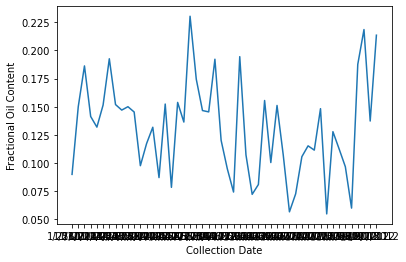

In [35]:
# let's look at average oil content over time
avgOil =oil_areas_df.groupby(['Collection Date']).median()
sns.lineplot(data=avgOil, x='Collection Date', y='Fractional Oil Content')
plt.show()

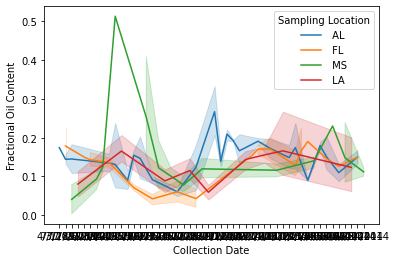

In [31]:
sns.lineplot(data=oil_areas_df, x='Collection Date', y='Fractional Oil Content', hue='Sampling Location')
plt.show()

In [39]:
#Let's look @ latitude and longitude color coded based on oil content

geoDf = gpd.GeoDataFrame(oil_sand_df,geometry=gpd.points_from_xy(oil_sand_df.Longitude, oil_sand_df.Latitude))
world = 
print(geoDf.head())

  Sample Number Collection Date  Sample ID   Sampling Location   Latitude  \
0             1        4/3/2011  040311-11  Dauphin Island, AL  30.242830   
1             2       7/17/2011  071711-03     Perdido Key, FL  30.308542   
2             3       7/17/2011  071711-04     Perdido Key, FL  30.308542   
3             4       7/17/2011  071711-05     Perdido Key, FL  30.308542   
4             5       7/17/2011  071711-06     Perdido Key, FL  30.308542   

   Longitude Processing Lab  Fractional Oil Content  \
0 -88.122680         Reddya                0.174400   
1 -87.371185        Aepplib                0.129956   
2 -87.371185         Aeppli                0.182391   
3 -87.371185         Aeppli                0.148263   
4 -87.371185         Aeppli                0.313752   

  Fractional Moisture Content                    geometry  
0                          ND  POINT (-88.12268 30.24283)  
1                    0.003369  POINT (-87.37118 30.30854)  
2                    0.013

In [76]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.region == 'Southeast'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
geoDf.plot(ax=ax, color='red')

plt.show()

AttributeError: 'GeoDataFrame' object has no attribute 'region'

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
0,1,4/3/2011,040311-11,AL,30.242830,-88.122680,Reddya,0.174400,ND
1,2,7/17/2011,071711-03,FL,30.308542,-87.371185,Aepplib,0.129956,0.003369
2,3,7/17/2011,071711-04,FL,30.308542,-87.371185,Aeppli,0.182391,0.013961
3,4,7/17/2011,071711-05,FL,30.308542,-87.371185,Aeppli,0.148263,0.004093
4,5,7/17/2011,071711-06,FL,30.308542,-87.371185,Aeppli,0.313752,0.031155
...,...,...,...,...,...,...,...,...,...
560,561,6/24/2014,062414-41,MS,30.207897,-88.960990,Reddy,0.104000,ND
561,562,6/24/2014,062414-42,MS,30.207897,-88.960990,Reddy,0.195900,ND
562,563,6/24/2014,062414-43,MS,30.207897,-88.960990,Reddy,0.158900,ND
563,564,6/24/2014,062414-44,MS,30.207897,-88.960990,Reddy,0.109100,ND


In [46]:
states = gpd.read_file('data/usa-states-census-2014.shp')
southeast = states[states['STUSPS'].isin(['FL','GA','AL','SC','NC', 'TN', 'AR', 'LA', 'MS'])]

DriverError: data/usa-states-census-2014.shp: No such file or directory

## Gulf Fisheries Data

In [12]:
commercial_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Commercial Fisheries")
commercial_shrimp_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Commercial Shrimp Fishery")
recreational_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Recreational Fisheries")
mariculture_df = pd.read_excel('data/gulf-fisheries.xlsx',sheet_name="Mariculture Fisheries")

## Fish Data

In [3]:
fish_df = pd.read_excel('data/fish.xlsx',sheet_name="Sheet1", header=2) #need to get in headers for columns when reading in data

In [4]:
fish_df.head()

,Sample,Species,d15N,d13C,d34S,%N,%C,C:N,MeHg,Ihg,...,SD.6,D201,SD.7,D204,SD.8,D199:D201,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,sample ID,fish type,NaN,NaN,NaN,NaN,NaN,NaN,ppb,ppb,...,NaN,0/00,NaN,0/00,NaN,ratioMercury in the marine environment poses e...,NaN,NaN,NaN,NaN
1,DC-12-102,Amberjack,15.470000,-16.690000,18.70,46.200000,13.500000,3.422222,3477,6,...,0.108163,1.276656,0.200675,-0.083326,0.106676,1.215708,NaN,NaN,NaN,NaN
2,DC-12-002,Amberjack,14.100000,-17.400000,19.25,47.600000,14.600000,3.260274,6368,383,...,0.108163,0.767604,0.200675,-0.17461,0.106676,1.291591,NaN,NaN,NaN,NaN
3,DC-12-099,Amberjack,12.800000,-16.900000,17.55,44.800000,14.300000,3.132867,4833,117,...,0.108163,0.60069,0.200675,-0.034849,0.106676,1.262907,NaN,NaN,NaN,NaN
4,DC-12-100,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2996.577762,69.255159,...,0.031484,1.23834,0.084361,-0.075762,0.094587,1.199252,NaN,NaN,NaN,NaN


In [9]:
fish_df.drop(fish_df.head(1).index,inplace = True) #removing column description row
fish_df.drop(list(fish_df.filter(regex = 'Unnamed')), axis = 1, inplace = True)

In [10]:
fish_df.head()

,Sample,Species,d15N,d13C,d34S,%N,%C,C:N,MeHg,Ihg,...,SD.4,D199,SD.5,D200,SD.6,D201,SD.7,D204,SD.8,D199:D201
2,DC-12-002,Amberjack,14.100000,-17.400000,19.25,47.600000,14.600000,3.260274,6368,383,...,0.508000,0.99143,0.228471,0.114607,0.108163,0.767604,0.200675,-0.17461,0.106676,1.291591
3,DC-12-099,Amberjack,12.800000,-16.900000,17.55,44.800000,14.300000,3.132867,4833,117,...,0.508000,0.758615,0.228471,0.089405,0.108163,0.60069,0.200675,-0.034849,0.106676,1.262907
4,DC-12-100,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2996.577762,69.255159,...,0.112423,1.485082,0.063942,0.083009,0.031484,1.23834,0.084361,-0.075762,0.094587,1.199252
5,DC-12-100 dup,amberjack,12.829524,-16.966473,19.55,46.487228,13.620681,3.412989,2628.493393,65.231211,...,0.112423,1.582262,0.063942,0.126591,0.031484,1.298218,0.084361,-0.123816,0.094587,1.218795
6,DC-12-539 M,amberjack,NaN,NaN,NaN,NaN,NaN,NaN,3320.685429,35.181258,...,0.340000,1.383377,0.050000,0.111303,0.060000,1.125664,0.040000,-0.079999,0.100000,1.228944


In [11]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 2 to 521
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample     520 non-null    object 
 1   Species    520 non-null    object 
 2   d15N       412 non-null    float64
 3   d13C       412 non-null    float64
 4   d34S       329 non-null    float64
 5   %N         404 non-null    float64
 6   %C         404 non-null    float64
 7   C:N        316 non-null    float64
 8   MeHg       506 non-null    object 
 9   Ihg        334 non-null    object 
 10  THg        340 non-null    object 
 11  MeHg.1     338 non-null    object 
 12  Ihg.1      338 non-null    object 
 13  Lat        513 non-null    float64
 14  Lon        513 non-null    float64
 15  d199       99 non-null     object 
 16  SD         100 non-null    object 
 17  d200       100 non-null    object 
 18  SD.1       99 non-null     float64
 19  d201       100 non-null    object 
 20  SD.2      

renaming some column names
the following is supplemental information given by dataset owner:
* ID_Data_sample (sample ID), ID_Species (species common name), delta-15N Nitrogen stable isotope ratio 15N/14N 
          (‰, 'per mil', or parts per thousand), delta-13C Lipid Extracted Carbon stable isotope ratio (‰, 'per mil', 
          or parts per thousand), delta-13C Carbon isotope ratio 13C/12C (‰, 'per mil', or parts per thousand), 
          delta-34S Sulfur isotope ratio 34S/32S (‰, 'per mil', or parts per thousand), %N Nitrogen percent molar mass 
          composition (%), %C Carbon percent molar mass composition (%), C:N Carbon to Nitrogen mass ratio (%), MeHg 
          Methylmercury (ppb), iHg inorganic Mercury (ppb), THg Total Mercury (ppb), Latitude (decimal degrees), 
          Longitude (decimal degrees), two sets of d199 (0/00) thru d204 (0/00) and Standard Deviations. Common Name 
          of Species [Amberjack, Pinfish, King Snake Eel, Moray Eel, Cutthroat Eel, Rock Sea bass, Vermillion Snapper, 
          Snowy Grouper, Gag Grouper, Red Snapper, Red Porgy, Cubbyu, Almaco jack, Longspine Porgy, Warsaw Grouper, 
          Yellow-Edge Grouper, Scamp, Grey Triggerfish, Whitebone Porgy, Grey Snapper, Inshore Lizard Fish, Hermit 
          Crab, Bank Sea Bass, Tomtate, Black Sea Bass, Shrimp]|||||